# Imports

In [1]:
# Data manipulation libraries
import pandas as pd
import numpy as np

# File and system libraries
import gzip
import shutil
import os

print("Libraries imported successfully.")

Libraries imported successfully.


# Unzip

In [2]:
gzipped_file_path = r'C:\\Users\\renat\\Documents\\Neurotech\\Project-4\\base_antifraude.gz'
output_file_path = 'base_antifraude.csv'

# Check if the compressed file exists before proceeding
if not os.path.exists(gzipped_file_path):
    print(f"Error: The file '{gzipped_file_path}' was not found.")
else:
    try:
        print(f"Decompressing '{gzipped_file_path}'...")

        with gzip.open(gzipped_file_path, 'rb') as f_in:
            with open(output_file_path, 'wb') as f_out:
                # Copy the decompressed content from the input to the output file
                shutil.copyfileobj(f_in, f_out)
        
        print(f"Success! File decompressed to '{output_file_path}'")
        
    except Exception as e:
        print(f"An error occurred during decompression: {e}")

Decompressing 'C:\\Users\\renat\\Documents\\Neurotech\\Project-4\\base_antifraude.gz'...
Success! File decompressed to 'base_antifraude.csv'


# Leitura e Teste de Sanidade

In [3]:
csv_file_path = output_file_path

try:
    data_frame = pd.read_csv(csv_file_path, sep='\t')
    
    print(f"Success! File '{csv_file_path}' loaded into a DataFrame.")
    
    display(data_frame.head())
    
except FileNotFoundError:
    print(f"Error: The file '{csv_file_path}' was not found. Please ensure the previous cell ran successfully.")
except Exception as e:
    print(f"An error occurred while reading the file: {e}")

Success! File 'base_antifraude.csv' loaded into a DataFrame.


C:\Users\renat\AppData\Local\Temp\ipykernel_22028\4129346326.py:4: DtypeWarning: Columns (203) have mixed types. Specify dtype option on import or set low_memory=False.
  data_frame = pd.read_csv(csv_file_path, sep='\t')


,id,documento,mes_ref,alvo,vlr_financiado,VAR1,VAR2,VAR3,VAR4,VAR5,...,VAR191,VAR192,VAR193,VAR194,VAR195,VAR196,VAR197,VAR198,VAR199,VAR200
0,4db9c75f6a31c73414ad84fdd101b5d7,d92fa549809f55b4ea13caa1b108896f,202307,0.0,17820.60,0.166667,0.0,0.0,1.000000,NaN,...,0.609314,0.0,0.095790,NaN,0.066331,NaN,0.666667,0.135065,SUDESTE,0.0
1,9b07d4001632189d19de964894501e34,1af133c98723189f24bbfcb75abfcf92,202307,0.0,18513.56,0.166667,0.0,0.0,0.027211,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.666667,NaN,NORTE,0.0
2,d55b6a81203f5a5ae6f362c483f36ff1,9e95be945b56ff10dc43df22381c9002,202307,0.0,22943.80,0.000000,0.0,0.0,0.013605,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.333333,NaN,SUL,0.0
3,f6bb36049c3b42a62dfa88c46e0f79d2,50502098d83c37b5fa60241bc4bd6641,202307,0.0,19177.58,0.083333,0.0,0.0,0.020408,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.833333,NaN,NORTE,0.0
4,2755ed6330b4980ea24faa1081183dc7,aad24a7552d24b46188103f4249f17e7,202307,0.0,16644.85,0.000000,0.0,0.0,0.000000,NaN,...,0.045513,NaN,0.532964,NaN,NaN,NaN,0.500000,NaN,NORDESTE,0.0


In [4]:
if 'data_frame' not in locals():
    print("Error: The 'data_frame' variable was not found. Please run the previous cell to load the data.")
else:
    print("--- Shape Validation ---")
    
    expected_rows = 47732
    expected_cols = 205
    
    actual_rows, actual_cols = data_frame.shape
    
    print(f"Actual shape: {data_frame.shape}")
    print(f"Expected shape: ({expected_rows}, {expected_cols})")
    
    if actual_rows == expected_rows and actual_cols == expected_cols:
        print("✅ Shape validation passed!\n")
    else:
        print("⚠️ Shape validation failed!\n")

    print("--- Column Presence Validation ---")


    required_columns = ['id', 'documento', 'mes_ref', 'vlr_financiado', 'alvo']
    
    print(f"Checking for required columns: {required_columns}")
    
    missing_columns = set(required_columns) - set(data_frame.columns)
    
    if not missing_columns:
        print("✅ Column validation passed! All required columns are present.")
    else:
        print(f"⚠️ Column validation failed! Missing columns: {list(missing_columns)}")

--- Shape Validation ---
Actual shape: (47732, 205)
Expected shape: (47732, 205)
✅ Shape validation passed!

--- Column Presence Validation ---
Checking for required columns: ['id', 'documento', 'mes_ref', 'vlr_financiado', 'alvo']
✅ Column validation passed! All required columns are present.


# Limpeza Inicial

In [5]:
if 'data_frame' not in locals():
    print("Error: The 'data_frame' variable was not found. Please run the previous cells first.")
else:
    print("--- DataFrame Info ---")
    data_frame.info()

--- DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47732 entries, 0 to 47731
Columns: 205 entries, id to VAR200
dtypes: float64(190), int64(1), object(14)
memory usage: 74.7+ MB


In [6]:
if 'data_frame' not in locals():
    print("Error: The 'data_frame' variable was not found. Please run the previous cells first.")
else:
    print("--- Descriptive Statistics for Numerical Columns ---")
    display(data_frame.describe())

--- Descriptive Statistics for Numerical Columns ---


,mes_ref,alvo,vlr_financiado,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,...,VAR190,VAR191,VAR192,VAR193,VAR194,VAR195,VAR196,VAR197,VAR198,VAR200
count,47732.000000,47732.000000,47594.000000,26947.000000,26947.000000,40926.000000,42871.000000,2.991000e+03,47389.0,6047.000000,...,8.815000e+03,18139.000000,1894.000000,2.282900e+04,2991.000000,2.238000e+03,7704.000000,35629.000000,3838.000000,44930.000000
mean,202309.288653,0.041607,19183.781266,0.201139,0.156529,0.031447,0.501378,3.063411e-01,0.0,0.275528,...,2.464883e-01,0.188585,0.057550,2.751056e-01,0.393977,2.934698e-01,0.308971,0.489437,0.259947,0.054422
std,1.646360,0.199692,5535.485493,0.253286,0.293852,0.174525,0.483991,2.127711e-01,0.0,0.203745,...,2.260249e-01,0.186897,0.178369,2.133877e-01,0.224401,2.226813e-01,0.201970,0.180096,0.189631,0.165324
min,202307.000000,0.000000,2427.880000,0.000000,0.000000,0.000000,0.000000,5.601228e-07,0.0,0.000063,...,1.414208e-07,0.000025,0.000000,2.200547e-07,0.000001,3.038740e-07,0.000001,0.000000,0.000062,0.000000
25%,202308.000000,0.000000,15742.620000,0.000000,0.000000,0.000000,0.000000,1.429320e-01,0.0,0.125406,...,8.405769e-02,0.059845,0.000000,1.235316e-01,0.218558,1.078872e-01,0.163283,0.333333,0.130120,0.000000
50%,202309.000000,0.000000,18836.810000,0.083333,0.000000,0.000000,0.476190,2.626918e-01,0.0,0.229391,...,1.814668e-01,0.128681,0.000000,2.230746e-01,0.377240,2.409756e-01,0.277927,0.500000,0.211768,0.000000
75%,202311.000000,0.000000,22276.500000,0.333333,0.000000,0.000000,1.000000,4.208740e-01,0.0,0.352966,...,3.314579e-01,0.259011,0.000000,3.699415e-01,0.561068,4.509163e-01,0.409290,0.500000,0.336232,0.000000
max,202312.000000,1.000000,91283.650000,1.000000,1.000000,1.000000,1.000000,1.000001e+00,0.0,1.000063,...,1.000000e+00,1.000025,1.000000,1.000000e+00,1.000001,1.000000e+00,1.000001,1.000000,1.000062,1.000000


In [7]:
if 'data_frame' not in locals():
    print("Error: The 'data_frame' variable was not found. Please run the previous cells first.")
else:
    print("--- Total Null Values per Column ---")
    
    null_counts = data_frame.isnull().sum()
    
    display(null_counts[null_counts > 0])
    
    print("\n" + "="*50 + "\n") # Separator for clarity
    
    print("--- Top 20 Columns with the Most Null Values ---")
    display(null_counts.sort_values(ascending=False).head(20))

--- Total Null Values per Column ---


vlr_financiado      138
VAR1              20785
VAR2              20785
VAR3               6806
VAR4               4861
                  ...  
VAR196            40028
VAR197            12103
VAR198            43894
VAR199             6806
VAR200             2802
Length: 201, dtype: int64



--- Top 20 Columns with the Most Null Values ---


VAR87     47676
VAR24     47406
VAR157    47263
VAR121    47258
VAR148    46926
VAR60     46891
VAR21     46855
VAR178    46855
VAR72     46628
VAR27     46508
VAR74     46503
VAR169    46499
VAR118    46410
VAR137    46296
VAR47     46244
VAR53     46244
VAR143    46231
VAR55     46089
VAR162    46089
VAR77     46032
dtype: int64

In [8]:
if 'data_frame' not in locals():
    print("Error: The 'data_frame' variable was not found. Please run the previous cells first.")
else:
    column_to_check = 'alvo'

    if column_to_check not in data_frame.columns:
        print(f"Error: Column '{column_to_check}' does not exist in the DataFrame.")
        print(f"Available columns are: {data_frame.columns.tolist()}")
    else:
        nan_count = data_frame[column_to_check].isnull().sum()
        
        if nan_count > 0:
            total_rows = len(data_frame)
            
            nan_percentage = (nan_count / total_rows) * 100
            
            print(f"Analysis for column: '{column_to_check}'")
            print(f"Number of NaN values: {nan_count}")
            print(f"Percentage of total rows: {nan_percentage:.2f}%")
        else:
            print(f"✅ Column '{column_to_check}' has no NaN values.")

✅ Column 'alvo' has no NaN values.


In [9]:
if 'data_frame' not in locals():
    print("Error: The 'data_frame' variable was not found. Please run the previous cells first.")
else:
    total_rows = len(data_frame)
    threshold = total_rows * 0.5
    
    null_counts = data_frame.isnull().sum()
    
    columns_to_drop = null_counts[null_counts > threshold].index.tolist()
    
    if columns_to_drop:
        print(f"Threshold for dropping is > {int(threshold)} null values.")
        print(f"Found {len(columns_to_drop)} columns to remove: {columns_to_drop}")
        
        # We are modifying the original dataframe in this step
        data_frame.drop(columns=columns_to_drop, inplace=True)
        
        print(f"\nColumns removed successfully.")
        print(f"New DataFrame shape: {data_frame.shape}")
        
    else:
        print("No columns found with more than 50% null values.")

    print("\n" + "="*50 + "\n")
    print("--- Re-evaluating Null Values After Removal ---")
    
    remaining_null_counts = data_frame.isnull().sum()
    columns_with_remaining_nulls = remaining_null_counts[remaining_null_counts > 0]
    num_cols_with_nulls = len(columns_with_remaining_nulls)
    
    if num_cols_with_nulls > 0:
        print(f"There are now {num_cols_with_nulls} columns with remaining null values.")
        display(columns_with_remaining_nulls.sort_values(ascending=False))
    else:
        print("✅ No more columns with null values remain in the dataset.")

Threshold for dropping is > 23866 null values.
Found 139 columns to remove: ['VAR5', 'VAR7', 'VAR8', 'VAR9', 'VAR12', 'VAR13', 'VAR14', 'VAR15', 'VAR16', 'VAR17', 'VAR19', 'VAR20', 'VAR21', 'VAR23', 'VAR24', 'VAR25', 'VAR26', 'VAR27', 'VAR28', 'VAR29', 'VAR30', 'VAR34', 'VAR35', 'VAR37', 'VAR38', 'VAR39', 'VAR40', 'VAR42', 'VAR43', 'VAR45', 'VAR46', 'VAR47', 'VAR48', 'VAR49', 'VAR50', 'VAR51', 'VAR53', 'VAR54', 'VAR55', 'VAR56', 'VAR57', 'VAR59', 'VAR60', 'VAR61', 'VAR64', 'VAR65', 'VAR67', 'VAR68', 'VAR71', 'VAR72', 'VAR73', 'VAR74', 'VAR75', 'VAR77', 'VAR79', 'VAR80', 'VAR81', 'VAR82', 'VAR83', 'VAR84', 'VAR85', 'VAR86', 'VAR87', 'VAR88', 'VAR89', 'VAR90', 'VAR91', 'VAR92', 'VAR94', 'VAR95', 'VAR96', 'VAR97', 'VAR98', 'VAR102', 'VAR105', 'VAR108', 'VAR110', 'VAR111', 'VAR113', 'VAR115', 'VAR116', 'VAR118', 'VAR120', 'VAR121', 'VAR123', 'VAR125', 'VAR126', 'VAR129', 'VAR130', 'VAR131', 'VAR133', 'VAR134', 'VAR135', 'VAR136', 'VAR137', 'VAR138', 'VAR139', 'VAR142', 'VAR143', 'VAR145', 

VAR31             23734
VAR127            23150
VAR119            22819
VAR33             20785
VAR36             20785
                  ...  
VAR62               343
VAR114              343
VAR128              343
VAR155              343
vlr_financiado      138
Length: 62, dtype: int64

In [10]:
if 'data_frame' not in locals():
    print("Error: The 'data_frame' variable was not found. Please run the previous cells first.")
else:
    print("--- Distribution of Data Types in the DataFrame ---")

    dtype_counts = data_frame.dtypes.value_counts()
    
    display(dtype_counts)

--- Distribution of Data Types in the DataFrame ---


float64    51
object     14
int64       1
Name: count, dtype: int64

In [11]:
if 'data_frame' not in locals():
    print("Error: The 'data_frame' variable was not found. Please run the previous cells first.")
else:
    object_columns = data_frame.select_dtypes(include=['object']).columns

    print(f"--- Showing first 5 rows for the {len(object_columns)} 'object' columns ---")
    display(data_frame[object_columns].head())

--- Showing first 5 rows for the 14 'object' columns ---


,id,documento,VAR31,VAR41,VAR52,VAR100,VAR103,VAR104,VAR112,VAR119,VAR122,VAR175,VAR185,VAR199
0,4db9c75f6a31c73414ad84fdd101b5d7,d92fa549809f55b4ea13caa1b108896f,N,ALTA,F,LONGE,MEDIA,S,ALTA,C,N,A,ALTA,SUDESTE
1,9b07d4001632189d19de964894501e34,1af133c98723189f24bbfcb75abfcf92,NaN,ALTISSIMA,NaN,PROXIMO,SEM PASSAGEM,NaN,ALTISSIMA,NaN,N,NaN,ALTISSIMA,NORTE
2,d55b6a81203f5a5ae6f362c483f36ff1,9e95be945b56ff10dc43df22381c9002,N,ALTA,A,LONGE,SEM PASSAGEM,S,ALTA,L,N,A,ALTA,SUL
3,f6bb36049c3b42a62dfa88c46e0f79d2,50502098d83c37b5fa60241bc4bd6641,N,ALTA,A,PROXIMO,SEM PASSAGEM,S,ALTISSIMA,NaN,N,A,ALTISSIMA,NORTE
4,2755ed6330b4980ea24faa1081183dc7,aad24a7552d24b46188103f4249f17e7,N,MEDIA,NaN,PROXIMO,SEM PASSAGEM,S,MEDIA,M,N,NaN,MEDIA,NORDESTE


In [12]:
if 'data_frame' not in locals():
    print("Error: The 'data_frame' variable was not found. Please run the previous cells first.")
else:
    # --- Configuration Thresholds ---
    ID_UNIQUENESS_THRESHOLD = 0.95
    LOW_CARDINALITY_THRESHOLD = 50

    # --- Initialization ---
    identifier_cols = []
    binary_cols = []
    low_cardinality_categorical = {}
    other_cols = []

    total_rows = len(data_frame)

    # --- Classification Loop ---
    for col in data_frame.columns:
        n_unique = data_frame[col].nunique()
        unique_ratio = n_unique / total_rows

        if unique_ratio >= ID_UNIQUENESS_THRESHOLD:
            identifier_cols.append(col)
        elif n_unique == 2:
            binary_cols.append(col)
        elif n_unique <= LOW_CARDINALITY_THRESHOLD:
            low_cardinality_categorical[col] = n_unique
        else:
            # Captures any column that doesn't fit the criteria above
            other_cols.append(col)

    # --- Reporting Results ---
    print("--- Identifier Columns ---")
    print(f"Found {len(identifier_cols)} columns with >= {ID_UNIQUENESS_THRESHOLD*100}% unique values.")
    print(identifier_cols)

    print("\n--- Binary Columns ---")
    print(f"Found {len(binary_cols)} columns with 2 unique values.")
    print(binary_cols)

    print("\n--- Low Cardinality Categorical Columns (<= {LOW_CARDINALITY_THRESHOLD} unique values) ---")
    print(f"Found {len(low_cardinality_categorical)} columns for inspection.")
    sorted_low_cardinality = dict(sorted(low_cardinality_categorical.items(), key=lambda item: item[1]))
    print(sorted_low_cardinality)

    print("\n--- Other Columns (High Cardinality / Continuous) ---")
    print(f"Found {len(other_cols)} columns that did not fit other categories.")
    print(other_cols)

--- Identifier Columns ---
Found 2 columns with >= 95.0% unique values.
['id', 'documento']

--- Binary Columns ---
Found 11 columns with 2 unique values.
['alvo', 'VAR3', 'VAR31', 'VAR63', 'VAR78', 'VAR104', 'VAR114', 'VAR122', 'VAR124', 'VAR147', 'VAR188']

--- Low Cardinality Categorical Columns (<= {LOW_CARDINALITY_THRESHOLD} unique values) ---
Found 42 columns for inspection.
{'VAR6': 1, 'VAR76': 1, 'VAR117': 1, 'VAR127': 1, 'VAR140': 1, 'VAR153': 1, 'VAR163': 1, 'VAR2': 3, 'VAR41': 4, 'VAR167': 4, 'VAR180': 4, 'VAR185': 4, 'VAR62': 5, 'VAR93': 5, 'VAR100': 5, 'VAR103': 5, 'VAR112': 5, 'VAR199': 5, 'mes_ref': 6, 'VAR36': 6, 'VAR66': 6, 'VAR69': 6, 'VAR99': 6, 'VAR155': 6, 'VAR197': 7, 'VAR101': 8, 'VAR128': 8, 'VAR33': 9, 'VAR132': 9, 'VAR52': 11, 'VAR141': 11, 'VAR175': 11, 'VAR200': 12, 'VAR1': 13, 'VAR154': 13, 'VAR58': 15, 'VAR109': 18, 'VAR119': 19, 'VAR22': 28, 'VAR172': 31, 'VAR11': 44, 'VAR70': 45}

--- Other Columns (High Cardinality / Continuous) ---
Found 11 columns tha

In [13]:
if 'data_frame' not in locals() or 'identifier_cols' not in locals():
    print("Error: Required variables ('data_frame', 'identifier_cols') not found. Please run the previous cells first.")
else:
    print(f"Original DataFrame shape: {data_frame.shape}")
    
    print(f"\nRemoving {len(identifier_cols)} identifier columns...")
    data_frame.drop(columns=identifier_cols, inplace=True)
    print(f"Columns removed: {identifier_cols}")
    
    nunique_counts = data_frame.nunique()
    cols_with_one_value = nunique_counts[nunique_counts == 1].index.tolist()
    
    if cols_with_one_value:
        print(f"\nFound and removing {len(cols_with_one_value)} columns with only one unique value...")
        data_frame.drop(columns=cols_with_one_value, inplace=True)
        print(f"Columns removed: {cols_with_one_value}")
    else:
        print("\nNo columns with a single unique value were found.")

    print("\n" + "="*50)
    print(f"Final DataFrame shape after removals: {data_frame.shape}")


Original DataFrame shape: (47732, 66)

Removing 2 identifier columns...
Columns removed: ['id', 'documento']

Found and removing 7 columns with only one unique value...
Columns removed: ['VAR6', 'VAR76', 'VAR117', 'VAR127', 'VAR140', 'VAR153', 'VAR163']

Final DataFrame shape after removals: (47732, 57)


In [14]:

if 'data_frame' not in locals():
    print("Error: The 'data_frame' variable was not found. Please run the previous cells first.")
elif 'alvo' not in data_frame.columns:
    print("Error: The target column 'alvo' was not found in the DataFrame.")
else:
    # 1. Numerical Analysis (Counts)
    print("--- Target Variable Distribution (Counts) ---")
    target_counts = data_frame['alvo'].value_counts()
    display(target_counts)

    # 2. Numerical Analysis (Percentages)
    print("\n--- Target Variable Distribution (Percentage) ---")
    target_percentages = data_frame['alvo'].value_counts(normalize=True) * 100
    display(target_percentages.map('{:.2f}%'.format))

--- Target Variable Distribution (Counts) ---


alvo
0.0    45746
1.0     1986
Name: count, dtype: int64


--- Target Variable Distribution (Percentage) ---


alvo
0.0    95.84%
1.0     4.16%
Name: proportion, dtype: object

# Análise de variáveis

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


from scipy.stats import chi2_contingency, ks_2samp
from itertools import combinations

# Set a visually appealing theme for the plots
sns.set_theme(style="whitegrid")

# Ensure plots are displayed within the notebook
%matplotlib inline

print("Visualization libraries imported and theme set.")

Visualization libraries imported and theme set.


## Binárias

In [16]:
if 'data_frame' not in locals() or 'binary_cols' not in locals():
    print("Error: Required variables ('data_frame', 'binary_cols') not found. Please run the previous cells first.")
elif 'alvo' not in data_frame.columns:
    print("Error: The target column 'alvo' was not found in the DataFrame.")
else:
    print("--- Analyzing relationship between binary features and the 'alvo' target ---")
    
    for col in binary_cols:
        # We don't want to cross-tab the target with itself
        if col == 'alvo':
            continue

        print(f"\n" + "="*50)
        print(f"Analysis for Binary Column: '{col}'")
        print("="*50)

        # Crosstab with percentages
        print("\n[Percentage by Row]")
        crosstab_perc = pd.crosstab(data_frame[col], data_frame['alvo'], normalize='index') * 100
        display(crosstab_perc.map('{:.2f}%'.format))

--- Analyzing relationship between binary features and the 'alvo' target ---

Analysis for Binary Column: 'VAR3'

[Percentage by Row]


alvo,0.0,1.0
VAR3,,
0.0,96.57%,3.43%
1.0,60.92%,39.08%



Analysis for Binary Column: 'VAR31'

[Percentage by Row]


alvo,0.0,1.0
VAR31,,
N,96.09%,3.91%
S,97.50%,2.50%



Analysis for Binary Column: 'VAR63'

[Percentage by Row]


alvo,0.0,1.0
VAR63,,
0.0,95.17%,4.83%
1.0,95.46%,4.54%



Analysis for Binary Column: 'VAR78'

[Percentage by Row]


alvo,0.0,1.0
VAR78,,
0.0,96.35%,3.65%
1.0,52.56%,47.44%



Analysis for Binary Column: 'VAR104'

[Percentage by Row]


alvo,0.0,1.0
VAR104,,
N,95.85%,4.15%
S,96.07%,3.93%



Analysis for Binary Column: 'VAR114'

[Percentage by Row]


alvo,0.0,1.0
VAR114,,
0.0,95.88%,4.12%
1.0,95.90%,4.10%



Analysis for Binary Column: 'VAR122'

[Percentage by Row]


alvo,0.0,1.0
VAR122,,
N,95.79%,4.21%
S,95.99%,4.01%



Analysis for Binary Column: 'VAR124'

[Percentage by Row]


alvo,0.0,1.0
VAR124,,
0.0,96.64%,3.36%
1.0,64.57%,35.43%



Analysis for Binary Column: 'VAR147'

[Percentage by Row]


alvo,0.0,1.0
VAR147,,
0.0,95.61%,4.39%
1.0,66.76%,33.24%



Analysis for Binary Column: 'VAR188'

[Percentage by Row]


alvo,0.0,1.0
VAR188,,
0.0,95.90%,4.10%
1.0,94.49%,5.51%


In [17]:
binary_cols_prio = ['VAR3', 'VAR78', 'VAR124', 'VAR147']
binary_cols_low_prio = ['VAR31', 'VAR63', 'VAR104', 'VAR114', 'VAR122', 'VAR188']

In [18]:
# Analyze coverage and conditional default rate for priority binary columns

if 'data_frame' not in locals():
    print("Error: 'data_frame' not found. Please run previous cells.")
else:
    for col in binary_cols_prio:
        if col not in data_frame.columns:
            print(f"\nWarning: Column '{col}' not found. Skipping.")
            continue
            
        print(f"\n" + "="*50)
        print(f"Analysis for Priority Column: '{col}'")
        print("="*50)

        # 1. Calculate flag coverage (% of 1s)
        flag_coverage = data_frame[col].mean() * 100
        print(f"\nFlag Coverage (% of 1s): {flag_coverage:.2f}%")

        # 2. Calculate conditional default rate
        print("\nConditional Default Rate (Average of 'alvo'):")
        conditional_rate = data_frame.groupby(col)['alvo'].mean()
        display(conditional_rate.map('{:.2%}'.format))


Analysis for Priority Column: 'VAR3'

Flag Coverage (% of 1s): 3.14%

Conditional Default Rate (Average of 'alvo'):


VAR3
0.0     3.43%
1.0    39.08%
Name: alvo, dtype: object


Analysis for Priority Column: 'VAR78'

Flag Coverage (% of 1s): 2.05%

Conditional Default Rate (Average of 'alvo'):


VAR78
0.0     3.65%
1.0    47.44%
Name: alvo, dtype: object


Analysis for Priority Column: 'VAR124'

Flag Coverage (% of 1s): 3.70%

Conditional Default Rate (Average of 'alvo'):


VAR124
0.0     3.36%
1.0    35.43%
Name: alvo, dtype: object


Analysis for Priority Column: 'VAR147'

Flag Coverage (% of 1s): 1.28%

Conditional Default Rate (Average of 'alvo'):


VAR147
0.0     4.39%
1.0    33.24%
Name: alvo, dtype: object

VAR147 e VAR78 possuem baixa cobertura.

In [19]:
# Analyze flag impact on subgroups

if 'data_frame' not in locals():
    print("Error: 'data_frame' not found. Please run previous cells.")
else:
    flag_to_analyze = 'VAR147'
    
    if flag_to_analyze not in data_frame.columns:
        print(f"Error: Chosen flag '{flag_to_analyze}' not in DataFrame.")
    else:
        # Calculate the overall default rate for the entire dataset (baseline)
        overall_default_rate = data_frame['alvo'].mean()
        print(f"Overall Default Rate (Baseline): {overall_default_rate:.2%}\n")

        # --- Subgroup by 'vlr_financiado' ---
        print(f"--- Analyzing '{flag_to_analyze}' across 'vlr_financiado' quantiles ---")
        
        # Discretize 'vlr_financiado' into 4 quantiles (quartiles)
        data_frame['vlr_financiado_quantile'] = pd.qcut(data_frame['vlr_financiado'], q=4, duplicates='drop')
        
        # Create a pivot table for the conditional default rate
        pivot_vlr_rate = pd.pivot_table(data_frame, 
                                       values='alvo', 
                                       index='vlr_financiado_quantile', 
                                       columns=flag_to_analyze, 
                                       aggfunc='mean')
        
        # Calculate the lift by dividing the conditional rate by the baseline
        pivot_vlr_lift = pivot_vlr_rate / overall_default_rate
        
        print("\n[Conditional Default Rate]")
        display(pivot_vlr_rate.style.format('{:.2%}').background_gradient(cmap='YlOrRd'))
        
        print("\n[Lift vs. Baseline]")
        display(pivot_vlr_lift.style.format('{:.2f}x').background_gradient(cmap='coolwarm'))
        
        
        # --- Subgroup by 'mes_ref' ---
        print(f"\n\n--- Analyzing '{flag_to_analyze}' across 'mes_ref' ---")
        
        pivot_mes_rate = pd.pivot_table(data_frame, 
                                       values='alvo', 
                                       index='mes_ref', 
                                       columns=flag_to_analyze, 
                                       aggfunc='mean')
                                       
        pivot_mes_lift = pivot_mes_rate / overall_default_rate

        print("\n[Conditional Default Rate]")
        display(pivot_mes_rate.style.format('{:.2%}').background_gradient(cmap='YlOrRd'))
        
        print("\n[Lift vs. Baseline]")
        display(pivot_mes_lift.style.format('{:.2f}x').background_gradient(cmap='coolwarm'))

Overall Default Rate (Baseline): 4.16%

--- Analyzing 'VAR147' across 'vlr_financiado' quantiles ---

[Conditional Default Rate]


C:\Users\renat\AppData\Local\Temp\ipykernel_22028\1838092836.py:22: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_vlr_rate = pd.pivot_table(data_frame,


VAR147,0.000000,1.000000
vlr_financiado_quantile,,
"(2427.879, 15742.62]",1.91%,16.28%
"(15742.62, 18836.81]",2.83%,14.29%
"(18836.81, 22276.5]",4.42%,38.89%
"(22276.5, 91283.65]",7.86%,44.06%



[Lift vs. Baseline]


VAR147,0.000000,1.000000
vlr_financiado_quantile,,
"(2427.879, 15742.62]",0.46x,3.91x
"(15742.62, 18836.81]",0.68x,3.43x
"(18836.81, 22276.5]",1.06x,9.35x
"(22276.5, 91283.65]",1.89x,10.59x




--- Analyzing 'VAR147' across 'mes_ref' ---

[Conditional Default Rate]


VAR147,0.000000,1.000000
mes_ref,,
202307,4.41%,36.54%
202308,4.36%,30.99%
202309,4.45%,22.39%
202310,4.16%,31.67%
202311,4.33%,56.76%
202312,4.71%,32.20%



[Lift vs. Baseline]


VAR147,0.000000,1.000000
mes_ref,,
202307,1.06x,8.78x
202308,1.05x,7.45x
202309,1.07x,5.38x
202310,1.00x,7.61x
202311,1.04x,13.64x
202312,1.13x,7.74x



--- Heatmap of Binary Variable Similarity ---


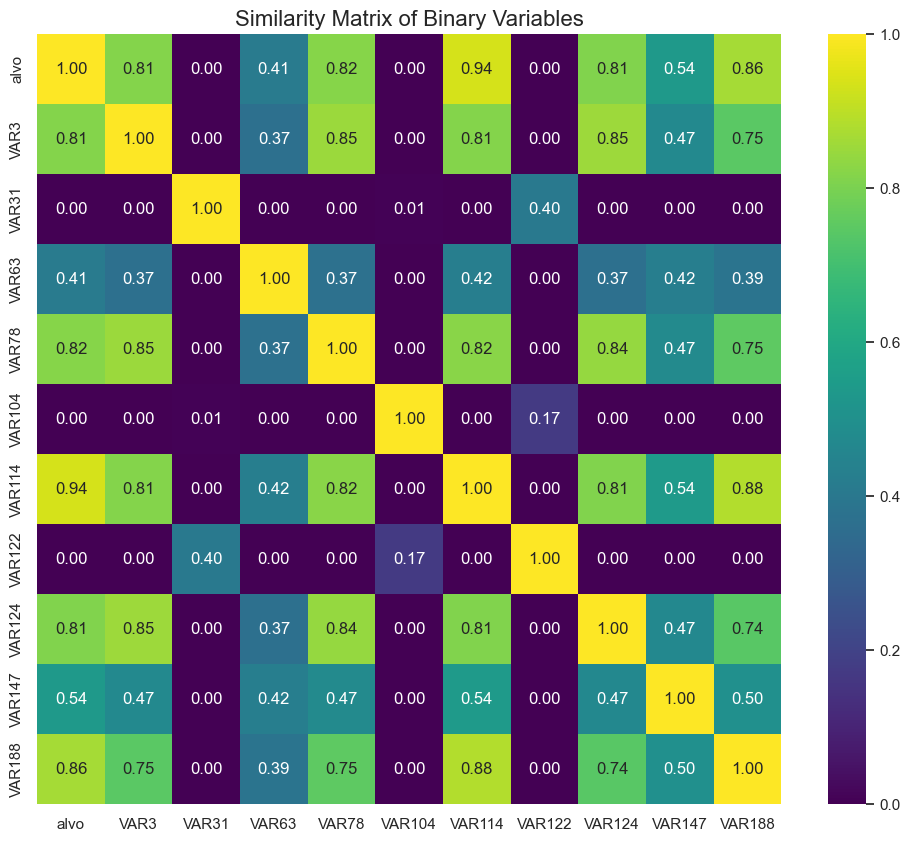

In [20]:
# Analyze similarity between binary variables

if 'data_frame' not in locals() or 'binary_cols' not in locals():
    print("Error: Required variables ('data_frame', 'binary_cols') not found. Please run previous cells.")
else:
    # Select only the binary columns for this analysis
    binary_df = data_frame[binary_cols]

    # Initialize an empty DataFrame to store the similarity scores
    similarity_matrix = pd.DataFrame(index=binary_cols, columns=binary_cols, dtype=float)

    # Calculate the simple matching coefficient for each pair of columns
    for col1, col2 in combinations(binary_cols, 2):
        similarity = (binary_df[col1] == binary_df[col2]).mean()
        similarity_matrix.loc[col1, col2] = similarity
        similarity_matrix.loc[col2, col1] = similarity
    
    # Fill the diagonal with 1s, as a column is always 100% similar to itself
    np.fill_diagonal(similarity_matrix.values, 1.0)

    # --- Visualize the matrix as a heatmap ---
    print("\n--- Heatmap of Binary Variable Similarity ---")
    plt.figure(figsize=(12, 10))
    
    # Create the heatmap
    sns.heatmap(
        similarity_matrix, 
        annot=True,          # Show the similarity values on the map
        cmap='viridis',      # Color scheme
        fmt='.2f'            # Format numbers to 2 decimal places
    )
    
    plt.title('Similarity Matrix of Binary Variables', fontsize=16)
    plt.show()

Cuidado com a VAR114, alta similaridade com o alvo. VAR31, VAR104 E VAR122 são candidatas a exclusão.

In [21]:
data_frame.drop(columns=['VAR114', 'VAR31', 'VAR104', 'VAR122'], inplace=True)

## Baixa Cardinalidade

In [22]:
def is_uniform_division(column):
    """
    Checks if a column's unique values form a uniform division of the [0, 1] interval.
    """
    unique_vals = pd.Series(column.dropna().unique()).sort_values().reset_index(drop=True)
    if len(unique_vals) < 2:
        return False
    n_groups = len(unique_vals)
    ideal_pattern = np.linspace(0, 1, n_groups)
    return np.allclose(unique_vals, ideal_pattern)


if 'data_frame' not in locals() or 'low_cardinality_categorical' not in locals():
    print("Error: Required variables ('data_frame', 'low_cardinality_categorical') not found. Please run previous cells.")
else:
    # --- Initialization ---
    discarded_cols = []
    clear_categorical_cols = []
    possible_discrete_float_cols = []

    # --- Classification Loop (Now using the pre-filtered dictionary) ---
    for col, n_unique in low_cardinality_categorical.items():
        # Robustness Check: Ensure the column still exists after prior cleaning steps
        if col not in data_frame.columns:
            continue

        dtype = data_frame[col].dtype

        # 2. Check for clear categorical columns
        if pd.api.types.is_string_dtype(dtype):
            clear_categorical_cols.append(col)
            continue
        
        if pd.api.types.is_numeric_dtype(dtype) and is_uniform_division(data_frame[col]):
            clear_categorical_cols.append(col)
            continue

        # 3. If it's not a string or a uniform pattern, it's a 'possible discrete float'
        if pd.api.types.is_numeric_dtype(dtype):
            possible_discrete_float_cols.append(col)

    # --- Reporting Results ---
    print("--- Column Classification Results (from low_cardinality_categorical list) ---")
    
    print(f"\n[2] Clear Categoricals (string or uniform division pattern): {len(clear_categorical_cols)} columns")
    print(clear_categorical_cols)

    print(f"\n[3] Possible Discrete Floats (low cardinality numeric): {len(possible_discrete_float_cols)} columns")
    print(possible_discrete_float_cols)

--- Column Classification Results (from low_cardinality_categorical list) ---

[2] Clear Categoricals (string or uniform division pattern): 32 columns
['VAR1', 'VAR2', 'VAR11', 'VAR33', 'VAR36', 'VAR41', 'VAR52', 'VAR58', 'VAR62', 'VAR66', 'VAR69', 'VAR93', 'VAR99', 'VAR100', 'VAR101', 'VAR103', 'VAR109', 'VAR112', 'VAR119', 'VAR128', 'VAR132', 'VAR141', 'VAR154', 'VAR155', 'VAR167', 'VAR172', 'VAR175', 'VAR180', 'VAR185', 'VAR197', 'VAR199', 'VAR200']

[3] Possible Discrete Floats (low cardinality numeric): 3 columns
['mes_ref', 'VAR22', 'VAR70']


In [23]:
if 'data_frame' not in locals() or 'clear_categorical_cols' not in locals():
    print("Error: Required variables ('data_frame', 'clear_categorical_cols') not found. Please run previous cells.")
elif not possible_discrete_float_cols:
    print("The list is empty. No values to display.")
else:
    # Create a dictionary to hold the results
    unique_values_dict = {}
    
    for col in possible_discrete_float_cols:
        # Get unique values and convert to a list for cleaner display
        unique_vals = data_frame[col].dropna().unique().tolist()
        
        # Sort the list to make patterns (like numeric sequences) more obvious
        try:
            unique_vals.sort()
        except TypeError:
            pass
            
        unique_values_dict[col] = unique_vals

    # For a clean, table-like output, we can create a pandas Series from the dictionary
    unique_values_series = pd.Series(unique_values_dict, name="Unique Values")
    
    # Set display options to ensure the full list is visible
    with pd.option_context('display.max_colwidth', None):
        display(unique_values_series)

mes_ref                                                                                                                                                                                                                                                                               [202307, 202308, 202309, 202310, 202311, 202312]
VAR22      [0.0, 0.032258067, 0.064516135, 0.09677419, 0.12903227, 0.16129032, 0.19354838, 0.22580646, 0.25806454, 0.29032257, 0.32258064, 0.3548387, 0.38709676, 0.41935486, 0.45161292, 0.48387095, 0.5161291, 0.5483871, 0.58064514, 0.6129032, 0.6451613, 0.67741936, 0.7096774, 0.7419355, 0.7741935, 0.90322584, 0.9354838, 1.0]
VAR70                   [0.0, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018, 0.019, 0.02, 0.021, 0.022, 0.023, 0.024, 0.025, 0.026, 0.027, 0.028, 0.029, 0.03, 0.031, 0.032, 0.033, 0.067, 0.1, 0.133, 0.167, 0.2, 0.233, 0.267, 0.3, 0.333, 0.667, 1.0]
Name: Unique Values

No fim, tudo categórico. Entretanto, alguns casos com cardinalidade alta demais com valores "faltando" (possivelmente não tinham entradas relacionadas no período).

In [24]:
def cramers_v(x, y):
    """
    Calculates Cramér's V statistic for categorical-categorical association.
    """
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    
    # Check for division by zero
    denominator = min((kcorr-1), (rcorr-1))
    if denominator == 0:
        return 1.0 # Perfect association if one dimension is 1
        
    return np.sqrt(phi2corr / denominator)

Analyzing association for 35 discrete columns...

--- Heatmap of Association (Cramér's V) ---


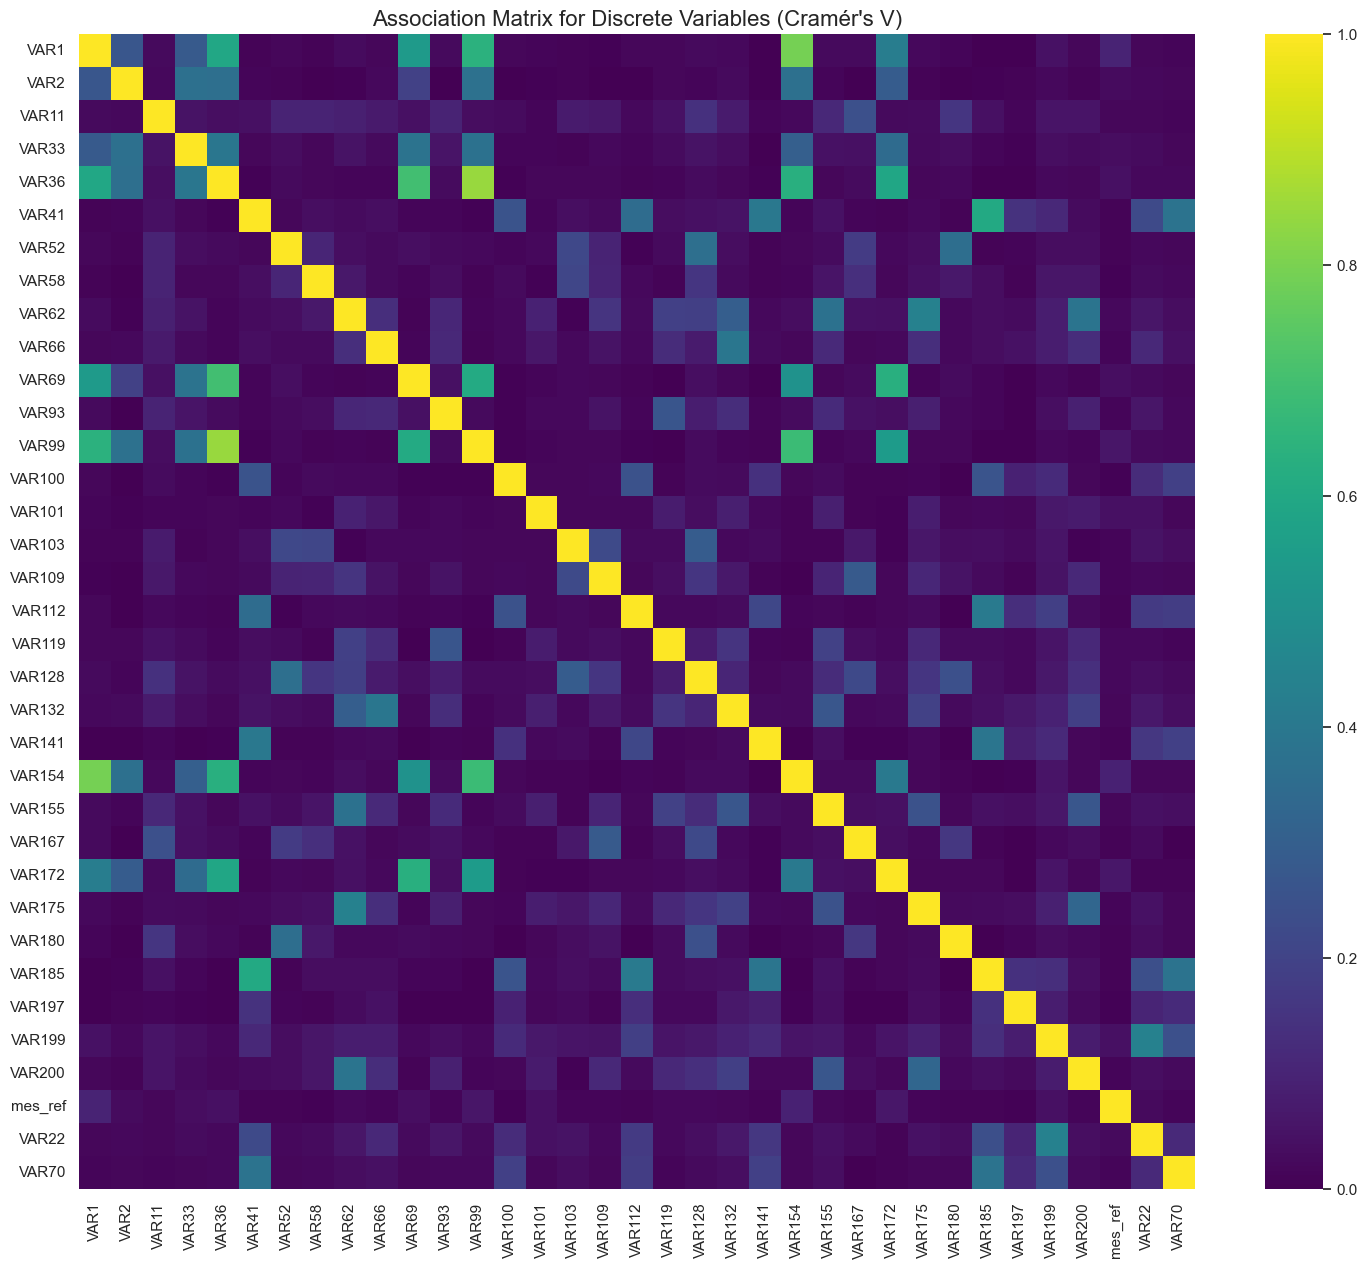

In [25]:
# Ensure the required classification lists exist (excluding binary_cols)
required_lists = ['clear_categorical_cols', 'possible_discrete_float_cols']

# 1. Consolidate the desired discrete columns into one list
all_discrete_cols = clear_categorical_cols + possible_discrete_float_cols

# Remove the target variable if it's present
if 'alvo' in all_discrete_cols:
    all_discrete_cols.remove('alvo')

print(f"Analyzing association for {len(all_discrete_cols)} discrete columns...")

# 2. Calculate the Cramér's V association matrix
cramers_matrix = pd.DataFrame(index=all_discrete_cols, columns=all_discrete_cols, dtype=float)

for col1, col2 in combinations(all_discrete_cols, 2):
    # Ensure columns exist in the dataframe before calculating
    if col1 in data_frame.columns and col2 in data_frame.columns:
        v_score = cramers_v(data_frame[col1], data_frame[col2])
        cramers_matrix.loc[col1, col2] = v_score
        cramers_matrix.loc[col2, col1] = v_score

np.fill_diagonal(cramers_matrix.values, 1.0)

# 3. Visualize the matrix as a heatmap
print("\n--- Heatmap of Association (Cramér's V) ---")
plt.figure(figsize=(18, 15))

sns.heatmap(
    cramers_matrix.fillna(0), # Fill any potential NaNs for plotting
    annot=False,
    cmap='viridis'
)

plt.title("Association Matrix for Discrete Variables (Cramér's V)", fontsize=16)
plt.show()

In [26]:
def calculate_woe_iv(data, feature, target):
    """
    Calculates WoE and IV for a given feature and binary target.
    """
    # Create a contingency table
    crosstab = pd.crosstab(data[feature], data[target], normalize='all')
    
    # Get total distribution of events (1) and non-events (0)
    total_events = data[target].sum()
    total_non_events = len(data) - total_events
    
    # Calculate WoE and IV
    woe_iv_table = pd.crosstab(data[feature], data[target])
    woe_iv_table.rename(columns={0: 'non_events', 1: 'events'}, inplace=True)
    
    # Add 0.5 to avoid division by zero
    woe_iv_table.replace(0, 0.5, inplace=True)
    
    woe_iv_table['dist_non_events'] = woe_iv_table['non_events'] / total_non_events
    woe_iv_table['dist_events'] = woe_iv_table['events'] / total_events
    
    woe_iv_table['woe'] = np.log(woe_iv_table['dist_non_events'] / woe_iv_table['dist_events'])
    
    woe_iv_table['iv'] = (woe_iv_table['dist_non_events'] - woe_iv_table['dist_events']) * woe_iv_table['woe']
    
    iv = woe_iv_table['iv'].sum()
    
    return woe_iv_table, iv

print("WoE and IV helper function defined.")

WoE and IV helper function defined.


In [27]:
#  Calculate Information Value (IV) for all discrete variables

iv_scores = {}

print("\n--- Calculating Information Value (IV) for each discrete variable ---")

for col in all_discrete_cols:
    try:
        woe_table, iv = calculate_woe_iv(data_frame, col, 'alvo')
        iv_scores[col] = iv
    except Exception as e:
        print(f"Could not calculate IV for '{col}'. Error: {e}")
        iv_scores[col] = 0.0

# Convert results to a pandas Series and sort by IV (higher is better)
iv_series = pd.Series(iv_scores, name="IV")
iv_series.sort_values(ascending=False, inplace=True)

print("Features ranked by Information Value (higher IV suggests stronger predictive power):")
display(iv_series.map('{:.4f}'.format))


--- Calculating Information Value (IV) for each discrete variable ---
Features ranked by Information Value (higher IV suggests stronger predictive power):


VAR119     0.1694
VAR101     0.1332
VAR69      0.1216
VAR36      0.1115
VAR99      0.1104
VAR33      0.1078
VAR154     0.0835
VAR172     0.0794
VAR1       0.0759
VAR93      0.0725
VAR199     0.0654
VAR52      0.0598
VAR128     0.0520
VAR22      0.0502
VAR2       0.0395
VAR70      0.0351
VAR180     0.0259
VAR11      0.0236
VAR66      0.0184
VAR112     0.0167
VAR132     0.0150
VAR167     0.0140
VAR175     0.0130
VAR109     0.0100
VAR200     0.0099
VAR58      0.0058
VAR103     0.0051
VAR141     0.0043
VAR197     0.0036
VAR41      0.0036
mes_ref    0.0024
VAR100     0.0022
VAR62      0.0019
VAR185     0.0009
VAR155     0.0009
Name: IV, dtype: object

In [28]:
if 'data_frame' not in locals() or 'iv_series' not in locals():
    print("Error: Required variables ('data_frame', 'iv_series') not found. Please run the feature analysis cells first.")
else:
    IV_THRESHOLD = 0.02
    keep_list = ['mes_ref']

    low_iv_features = iv_series[iv_series < IV_THRESHOLD].index.tolist()
    
    features_to_remove = [col for col in low_iv_features if col not in keep_list]
    
    protected_cols = [col for col in low_iv_features if col in keep_list]
    if protected_cols:
        print(f"Protected columns (exempted from removal): {protected_cols}")

    if features_to_remove:
        print(f"\nOriginal DataFrame shape: {data_frame.shape}")
        print(f"Found {len(features_to_remove)} features with IV < {IV_THRESHOLD} to remove (after exemption).")
        print(features_to_remove[:10], "..." if len(features_to_remove) > 10 else "")
        
        data_frame.drop(columns=features_to_remove, inplace=True)
        
        print("\nFeatures removed successfully.")
        print(f"New DataFrame shape: {data_frame.shape}")
    else:
        print(f"\nNo features to remove after applying the IV threshold and keep_list.")

Protected columns (exempted from removal): ['mes_ref']

Original DataFrame shape: (47732, 54)
Found 16 features with IV < 0.02 to remove (after exemption).
['VAR66', 'VAR112', 'VAR132', 'VAR167', 'VAR175', 'VAR109', 'VAR200', 'VAR58', 'VAR103', 'VAR141'] ...

Features removed successfully.
New DataFrame shape: (47732, 38)


In [29]:
if 'data_frame' not in locals():
    print("Error: The 'data_frame' variable was not found. Please run the previous cells first.")
else:
    # --- Configuration Thresholds ---
    ID_UNIQUENESS_THRESHOLD = 0.95
    LOW_CARDINALITY_THRESHOLD = 50

    # --- Initialization ---
    identifier_cols = []
    binary_cols = []
    low_cardinality_categorical = {}
    other_cols = []

    total_rows = len(data_frame)

    # --- Classification Loop ---
    for col in data_frame.columns:
        n_unique = data_frame[col].nunique()
        unique_ratio = n_unique / total_rows

        if unique_ratio >= ID_UNIQUENESS_THRESHOLD:
            identifier_cols.append(col)
        elif n_unique == 2:
            binary_cols.append(col)
        elif n_unique <= LOW_CARDINALITY_THRESHOLD:
            low_cardinality_categorical[col] = n_unique
        else:
            # Captures any column that doesn't fit the criteria above
            other_cols.append(col)

    # --- Reporting Results ---
    print("--- Identifier Columns ---")
    print(f"Found {len(identifier_cols)} columns with >= {ID_UNIQUENESS_THRESHOLD*100}% unique values.")
    print(identifier_cols)

    print("\n--- Binary Columns ---")
    print(f"Found {len(binary_cols)} columns with 2 unique values.")
    print(binary_cols)

    print("\n--- Low Cardinality Categorical Columns (<= {LOW_CARDINALITY_THRESHOLD} unique values) ---")
    print(f"Found {len(low_cardinality_categorical)} columns for inspection.")
    sorted_low_cardinality = dict(sorted(low_cardinality_categorical.items(), key=lambda item: item[1]))
    print(sorted_low_cardinality)

    print("\n--- Other Columns (High Cardinality / Continuous) ---")
    print(f"Found {len(other_cols)} columns that did not fit other categories.")
    print(other_cols)

--- Identifier Columns ---
Found 0 columns with >= 95.0% unique values.
[]

--- Binary Columns ---
Found 7 columns with 2 unique values.
['alvo', 'VAR3', 'VAR63', 'VAR78', 'VAR124', 'VAR147', 'VAR188']

--- Low Cardinality Categorical Columns (<= {LOW_CARDINALITY_THRESHOLD} unique values) ---
Found 20 columns for inspection.
{'VAR2': 3, 'VAR180': 4, 'vlr_financiado_quantile': 4, 'VAR93': 5, 'VAR199': 5, 'mes_ref': 6, 'VAR36': 6, 'VAR69': 6, 'VAR99': 6, 'VAR101': 8, 'VAR128': 8, 'VAR33': 9, 'VAR52': 11, 'VAR1': 13, 'VAR154': 13, 'VAR119': 19, 'VAR22': 28, 'VAR172': 31, 'VAR11': 44, 'VAR70': 45}

--- Other Columns (High Cardinality / Continuous) ---
Found 11 columns that did not fit other categories.
['vlr_financiado', 'VAR4', 'VAR10', 'VAR18', 'VAR32', 'VAR44', 'VAR106', 'VAR107', 'VAR144', 'VAR182', 'VAR184']


## Alta Cardinalidade / Contínuas

In [31]:
# Calculate Kolmogorov-Smirnov (KS) statistic for feature importance

# Ensure the required variables exist
if 'data_frame' not in locals():
    print("Error: 'data_frame' not found. Please run previous cells.")
else:
    ks_results = {}
    print("--- Calculating KS Statistic for each 'other' column against 'alvo' ---")

    for col in other_cols:
        # Check if column exists and is numeric before proceeding
        if col in data_frame.columns and pd.api.types.is_numeric_dtype(data_frame[col].dtype):
            # Separate the feature's values for each target class
            sample_0 = data_frame[data_frame['alvo'] == 0][col].dropna()
            sample_1 = data_frame[data_frame['alvo'] == 1][col].dropna()
            
            # Perform the two-sample KS test
            # We are interested in the 'statistic' value
            ks_statistic, p_value = ks_2samp(sample_0, sample_1)
            ks_results[col] = ks_statistic
        else:
            print(f"Skipping '{col}': not found or not a numeric type.")
            
    # Convert results to a pandas Series and sort by KS statistic (higher is better)
    ks_series = pd.Series(ks_results, name="KS Statistic")
    ks_series.sort_values(ascending=False, inplace=True)

    print("\nFeatures ranked by KS Statistic (higher value means better separation):")
    display(ks_series.map('{:.2%}'.format))

--- Calculating KS Statistic for each 'other' column against 'alvo' ---

Features ranked by KS Statistic (higher value means better separation):


vlr_financiado    26.24%
VAR10             11.28%
VAR184            10.89%
VAR4               6.01%
VAR32              4.96%
VAR18              4.41%
VAR44              2.28%
VAR107             1.75%
VAR182             1.59%
VAR106             1.43%
VAR144             1.20%
Name: KS Statistic, dtype: object